In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
import contextily as ctx
import xyzservices.providers as xyz
import easysnowdata as esd
import coincident
import sys
import os
sys.path.append(os.path.abspath('/home/jehayes/gda_final/ATL06_LaserLottery/misc'))
from nlcd_plot import nlcd_labels, nlcd_colors
import sr_wrapper
import stac_helper
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
gf_flights = gpd.read_file("/home/jehayes/gda_final/ATL06_LaserLottery/test_data/wesm_2021_bboxes_30d_esa.geojson")

In [6]:
gf_flights.sort_values("duration")[:2].explore()

In [7]:
test = gf_flights.sort_values("duration")[:2]

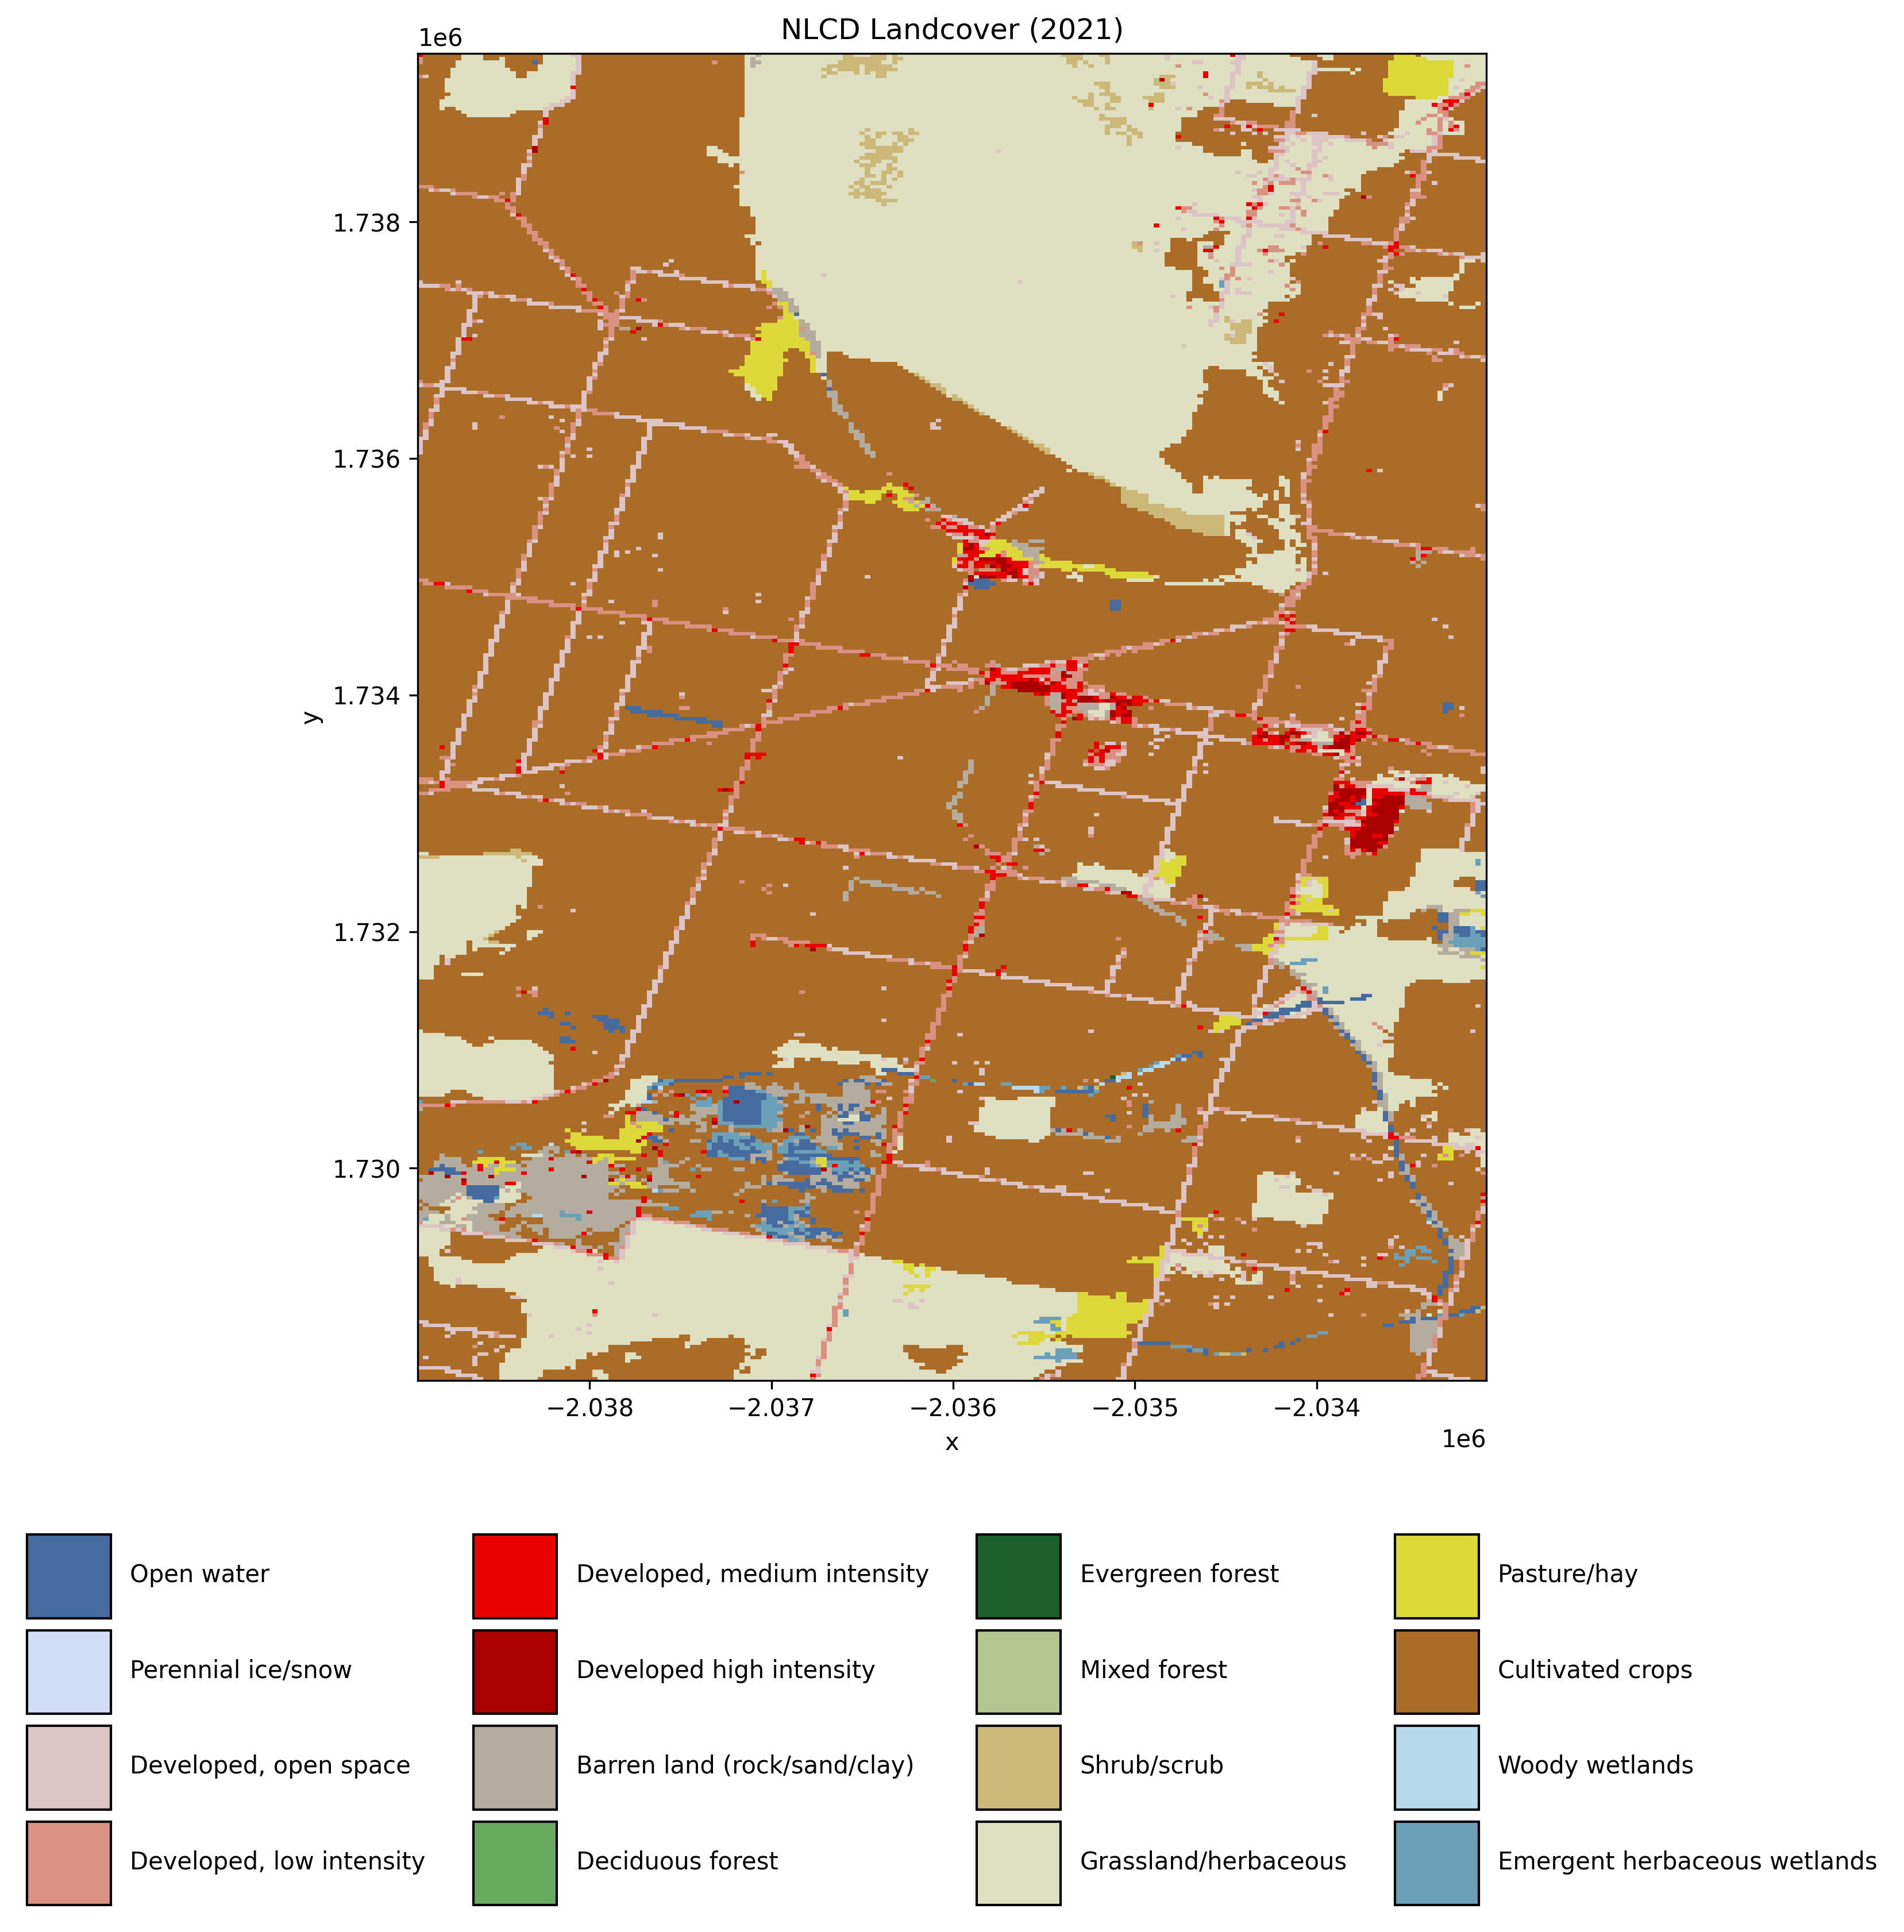

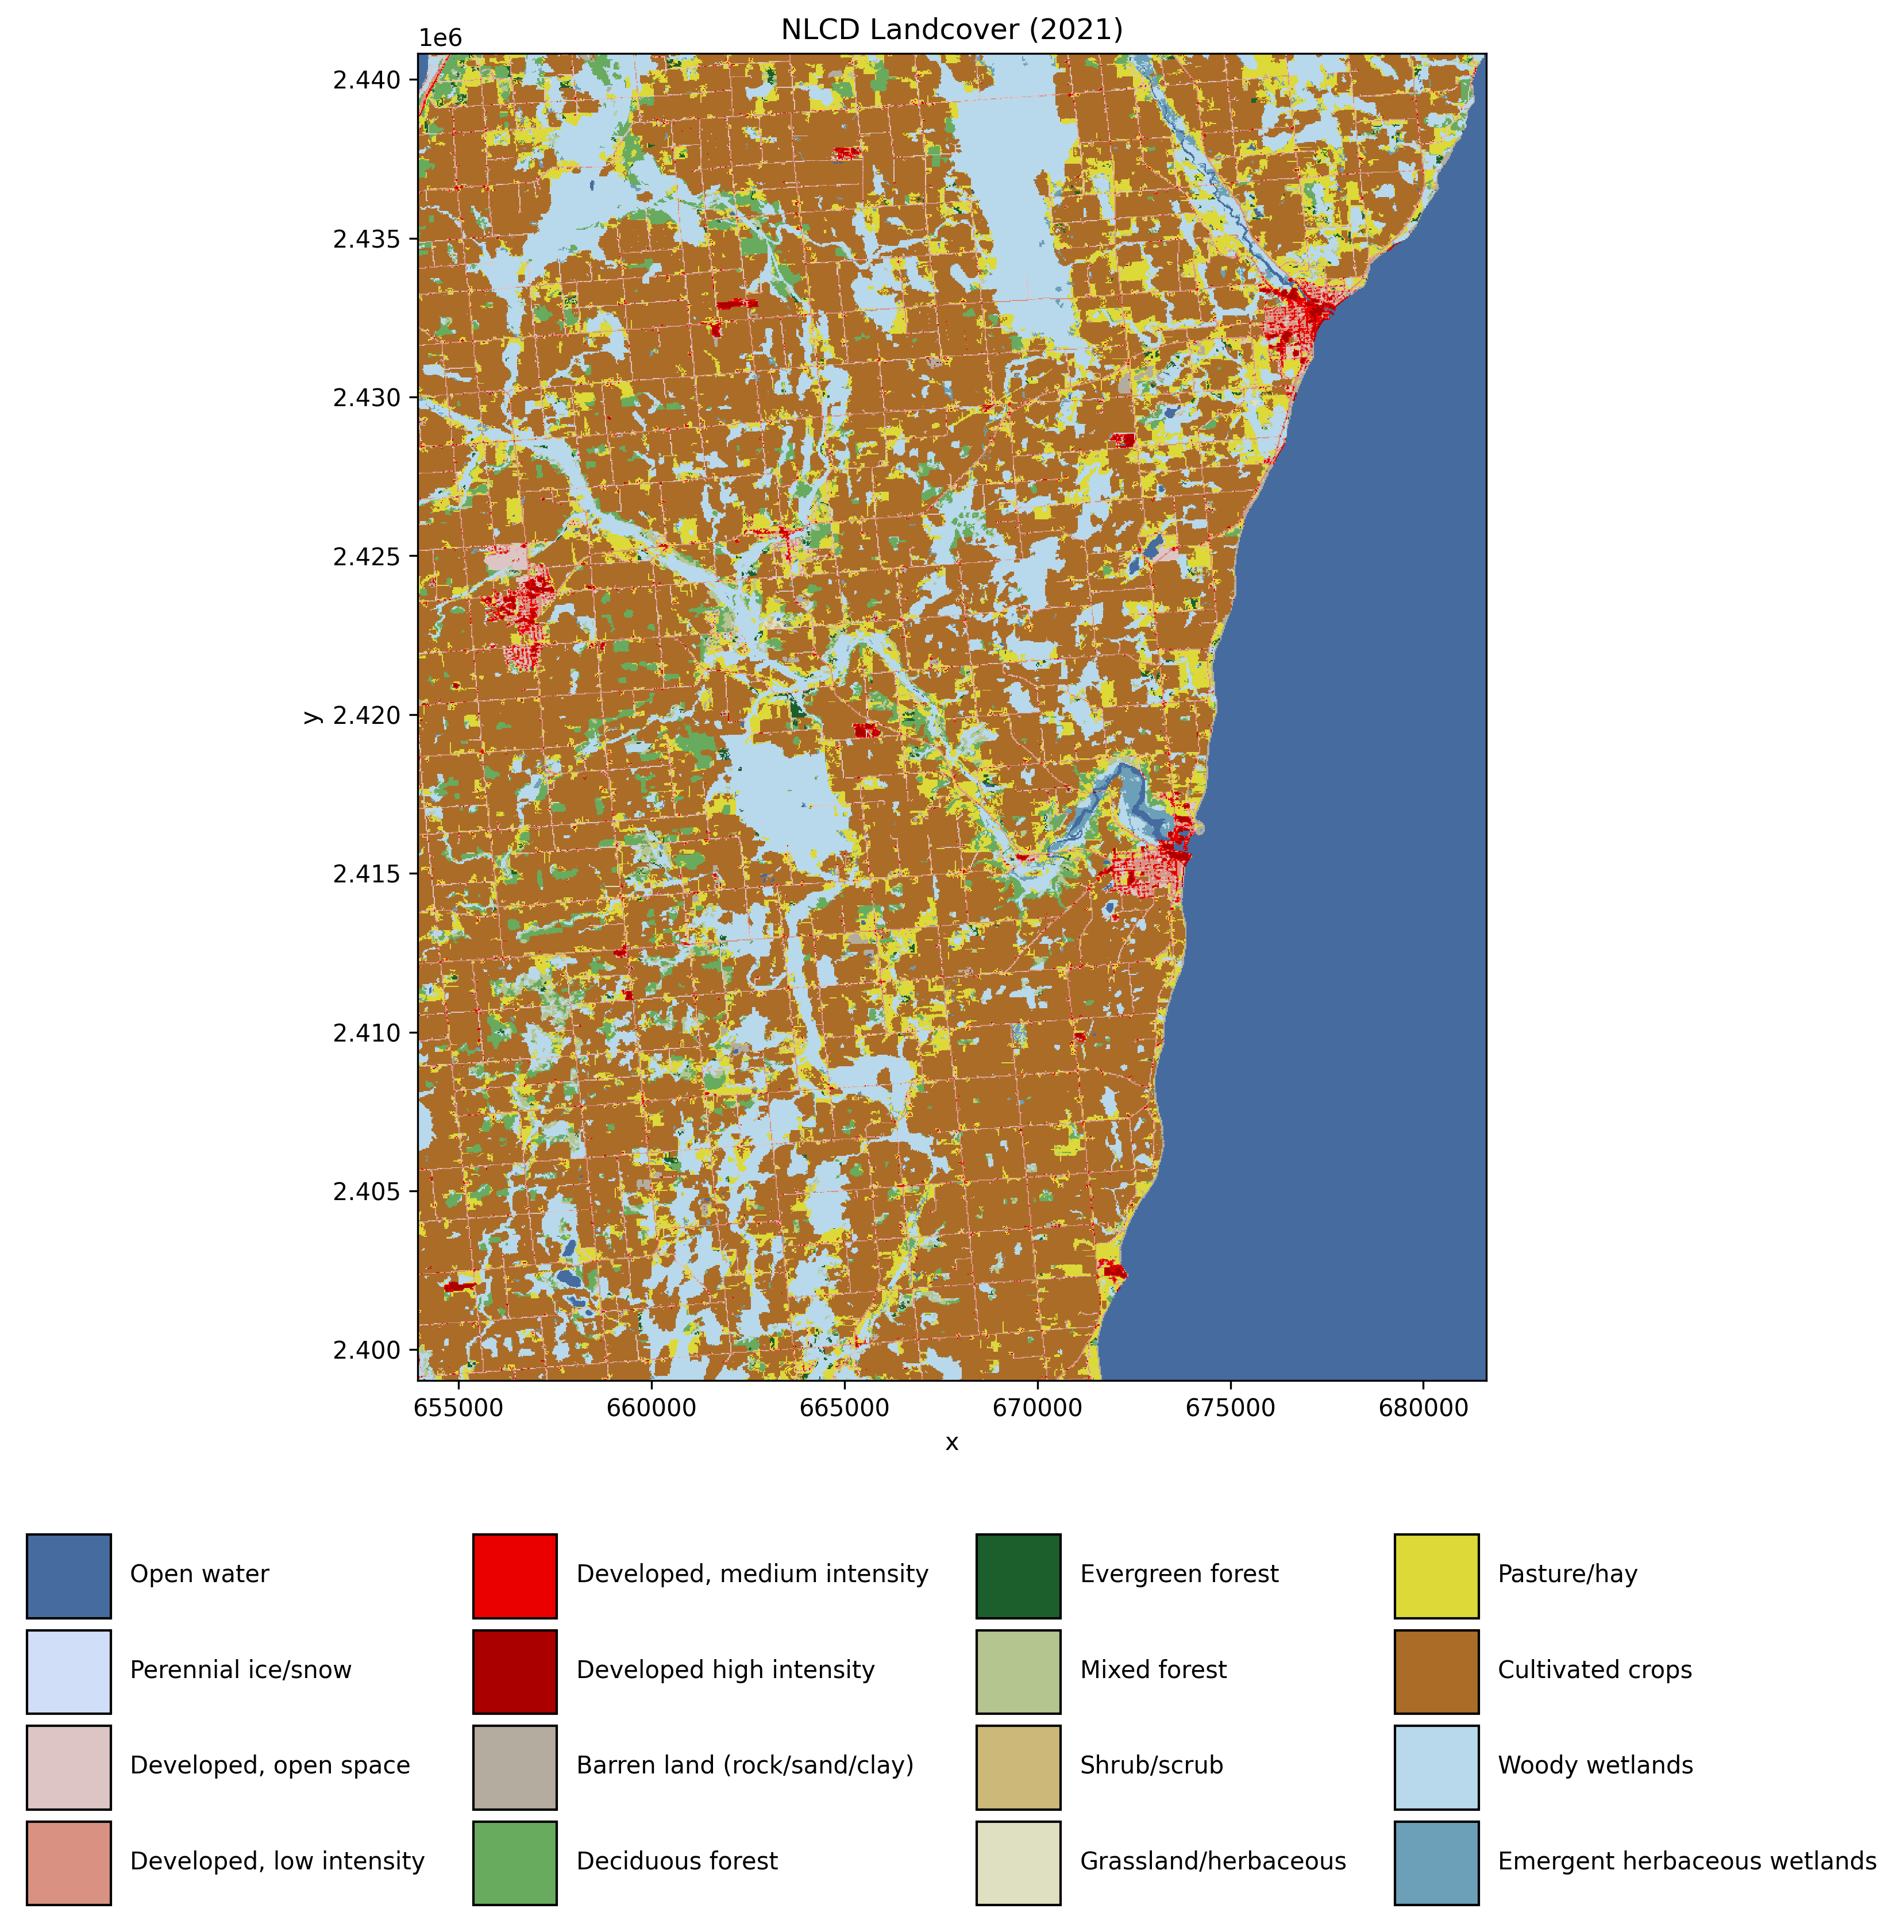

In [12]:
for i in range(len(test)):
    gf_wesm = coincident.search.wesm.load_by_fid(fids=test.iloc[[i]].fid.values)
    nlcd_landcover = esd.remote_sensing.get_nlcd_landcover(gf_wesm.iloc[0].geometry, layer='landcover')
    nlcd_landcover.attrs['example_plot'](nlcd_landcover);

In [19]:
secondary_datasets = [
    ("icesat-2", 5),
]
bang = gf_flights.sort_values("duration")[:5]
for i in range(5):
    print(bang.duration.iloc[i])
    try:
        dataframes = coincident.search.cascading_search(
            bang.iloc[[i]],
            secondary_datasets,
            min_overlap_area=30,  # km^2
        )
        print(len(dataframes[0]))
    except:
        print("no hits")
        continue

0
no hits
0
1
1
no hits
1
2
2
2


In [31]:
m = bang.iloc[[1]].explore()
secondary_datasets = [
    ("icesat-2", 24),
]
dataframes = coincident.search.cascading_search(
            bang.iloc[[1]],
            secondary_datasets,
            min_overlap_area=30,  # km^2
        )
dataframes[0].explore(m=m)

In [32]:
site = bang.iloc[[1]]

In [35]:
atl06_items = stac_helper.get_atl06_stac(site.iloc[0], window_days=5)
gf_atl06_stac = stac_helper.to_geopandas(atl06_items[0].item_collection())

In [36]:
gf_atl06_stac

,assets,bbox,collection,geometry,id,links,stac_extensions,stac_version,type,datetime,end_datetime,start_datetime,dayofyear
0,{'29/ATL06_20210329143830_00731106_006_01': {'...,"{'xmin': -89.50314, 'ymin': 28.7962, 'xmax': -...",ATL06_006,"POLYGON ((-85.70011 56.01173, -85.90028 56.022...",SC:ATL06.006:272228189,[{'href': 'https://cmr.earthdata.nasa.gov/stac...,[],1.0.0,Feature,2021-03-29 14:39:24.957000+00:00,2021-03-29 14:46:31.851000+00:00,2021-03-29 14:39:24.957000+00:00,88


In [53]:
from sliderule import icesat2
import sliderule

In [ ]:
icesat2.init("slideruleearth.io")

In [55]:
gf_atl06_points = sr_wrapper.get_atl06(
    gf_atl06_stac,
    window_start = atl06_items[1],
    window_end = atl06_items[2],
    aoi_geometry= site.iloc[0].geometry,
)

{'poly': [{'lon': -87.76737213134766, 'lat': 44.326171875}, {'lon': -87.37311553955078, 'lat': 44.326171875}, {'lon': -87.37311553955078, 'lat': 44.677879333496094}, {'lon': -87.76737213134766, 'lat': 44.677879333496094}, {'lon': -87.76737213134766, 'lat': 44.326171875}], 't0': '2021-03-28T00:00:00Z', 't1': '2021-04-07T00:00:00Z', 'srt': 0, 'cnf': 4, 'ats': 10.0, 'cnt': 10, 'len': 40.0, 'res': 20.0, 'geoid': True, 'vars': ['h_mean', 'latitude', 'longitude', 'h_sigma', 'quality_summary'], 'samples': {}}


In [56]:
atl06_items[1], atl06_items[2]

('2021-03-28T00:00:00Z', '2021-04-07T00:00:00Z')

In [57]:
gf_atl06_points 

,geometry
